# Data exploration

The purpose of this notebook is to explore the dataset and prepare it for further analyses.

## Reading and cleaning the data

First, we import the libraries and read the data.

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', None)

df = pd.read_csv('winemag-data-130k-v2.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),Pinot Noir,Sweet Cheeks


The first column is strangely named, so we rename it for convenience. Also let's remove any full duplicates.

We can already start collecting some insights about the data: there are 119988 entries with *id*, *title*, *winery*, *description* and *points* present (non-null) in every row. *Points* are given to the wine by a taster: better wines get higher points.

A handfull of records are missing *country*, *province* and *variety*. We will explore values in the *province* column a little later to better understand what's there. *Variety* is the grape variety (or grape blend) from which the wine was made.

There more missing values in *designation*, *price*, *region_1*, *region_2* and taster related columns. It's not clear at the moment how *designation*, *region_1* and *region_2* exactly differ, so we'll explore them later, too.

In [2]:
df.rename(columns={"Unnamed: 0": "id"}, inplace=True)
df.drop_duplicates(subset = df.columns.difference(['id']), inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119988 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     119988 non-null  int64  
 1   country                119929 non-null  object 
 2   description            119988 non-null  object 
 3   designation            85443 non-null   object 
 4   points                 119988 non-null  int64  
 5   price                  111593 non-null  float64
 6   province               119929 non-null  object 
 7   region_1               100428 non-null  object 
 8   region_2               46769 non-null   object 
 9   taster_name            95071 non-null   object 
 10  taster_twitter_handle  90542 non-null   object 
 11  title                  119988 non-null  object 
 12  variety                119987 non-null  object 
 13  winery                 119988 non-null  object 
dtypes: float64(1), int64(2), object(11)


## Exploring text and categorical columns

To make exploring the columns easier, we create a function, which essentially groups the data by desired columns and sorts in descending order of records.

In [3]:
def col_explore(cols):
    group = df.groupby(cols)[['id']].count()
    return group.sort_values('id', ascending=False)

The first column that we had questions about was *province*. After applying the function, limiting the output to 50 records, we see that province here can mean a state, a region, a province, a valley, etc. - essentially an area within the country where the grapes were collected and wine was made.

In [4]:
col_explore(['country', 'province'])[:50]#.sort_values('country')

id
country      province                   
US           California            33656
             Washington             7965
France       Bordeaux               5556
Italy        Tuscany                5391
US           Oregon                 4929
France       Burgundy               3683
Spain        Northern Spain         3554
Italy        Piedmont               3441
Argentina    Mendoza Province       3038
Italy        Veneto                 2501
US           New York               2456
France       Alsace                 2219
Italy        Northeastern Italy     1967
France       Loire Valley           1691
Italy        Sicily & Sardinia      1634
France       Champagne              1498
             Southwest France       1385
Australia    South Australia        1271
Italy        Southern Italy         1254
France       Provence               1197
Portugal     Douro                  1179
Italy        Central Italy          1134
Spain        Catalonia              1053
France       Rhône Valley            985
Germany      Mosel                   945
France       Beaujolais              944
Portugal     Alentejano              862
Chile        Colchagua Valley        781
US           Virginia                725
New Zealand  Marlborough             717
Portugal     Tejo                    633
France       France Other            623
Chile        Maipo Valley            614
Austria      Burgenland              607
France       Languedoc-Roussillon    572
Chile        Casablanca Valley       568
Portugal     Port                    565
Austria      Niederösterreich        540
Argentina    Other                   506
Italy        Lombardy                481
Spain        Central Spain           464
Portugal     Lisboa                  460
Chile        Maule Valley            432
South Africa Stellenbosch            421
Spain        Levante                 417
Portugal     Vinho Verde             382
Spain        Galicia                 377
Austria      Kamptal                 371
Chile        Central Valley          332
Austria      Wachau                  329

Now let's explore the relation between *province*, *region_1* and *region_2*. 

The first output below shows that *region_1* indicates a smaller area (if any, within the province) of wine origin. For example, Saint-Émilion (*region_1*) is within Bordeaux (*province*), France (*country*).

The second output shows that *region_2* indicates an even smaller area (if any, within the region_1) of wine origin. Interestigly, only US wines have values in *region_2* column.

In [5]:
col_explore(['country', 'province', 'region_1'])[:50].sort_values('country')

id
country   province           region_1                       
Argentina Mendoza Province   Mendoza                    2152
France    Provence           Côtes de Provence           767
          Bordeaux           Bordeaux Blanc              445
                             Saint-Émilion               533
          Champagne          Champagne                  1498
          Alsace             Alsace                     1973
          Burgundy           Chablis                     515
          Loire Valley       Sancerre                    500
          Southwest France   Cahors                      452
          Bordeaux           Bordeaux                    488
Italy     Piedmont           Barolo                     1493
          Tuscany            Brunello di Montalcino     1337
          Piedmont           Barbaresco                  740
          Tuscany            Toscana                    1115
                             Chianti Classico            966
          Sicily & Sardinia  Sicilia                     843
          Northeastern Italy Alto Adige                  633
Spain     Northern Spain     Rioja                      1349
                             Ribera del Duero            665
          Catalonia          Cava                        449
US        California         Santa Maria Valley          668
          Washington         Red Mountain                665
          New York           North Fork of Long Island   536
          California         Anderson Valley             597
          Oregon             Dundee Hills                508
          Virginia           Virginia                    521
          Washington         Horse Heaven Hills          514
          California         Santa Cruz Mountains        511
                             Sonoma Valley               620
                             Central Coast               704
                             Napa Valley                4174
                             Santa Ynez Valley           741
          Washington         Columbia Valley (WA)       3795
          California         Russian River Valley       2862
                             California                 2468
                             Paso Robles                2155
          Oregon             Willamette Valley          2111
          New York           Finger Lakes               1447
          California         Sonoma Coast               1374
                             Alexander Valley            732
                             Sonoma County              1163
                             Carneros                    930
                             Santa Barbara County        917
          Washington         Yakima Valley               917
          California         Sta. Rita Hills             904
                             Dry Creek Valley            870
                             Lodi                        756
                             Santa Lucia Highlands       741
          Washington         Walla Walla Valley (WA)     996
          Oregon             Oregon                      425

In [6]:
col_explore(['province','region_1', 'region_2'])[:50].sort_values('province')

id
province   region_1                  region_2               
California Napa Valley               Napa               4174
           Arroyo Grande Valley      Central Coast       157
           Santa Cruz Mountains      Central Coast       511
           Livermore Valley          Central Coast       418
           Rutherford                Napa                387
           Edna Valley               Central Coast       378
           Amador County             Sierra Foothills    368
           Sierra Foothills          Sierra Foothills    367
           Sonoma Valley             Sonoma              620
           Monterey                  Central Coast       321
           North Coast               North Coast         311
           El Dorado                 Sierra Foothills    281
           Oakville                  Napa                273
           St. Helena                Napa                213
           Arroyo Seco               Central Coast       194
           Green Valley              Sonoma              191
           Howell Mountain           Napa                168
           Monterey County           Central Coast       316
           Santa Maria Valley        Central Coast       668
           Mount Veeder              Napa                154
           Alexander Valley          Sonoma              732
           Central Coast             Central Coast       675
           Carneros                  Napa-Sonoma         930
           Santa Barbara County      Central Coast       917
           Sta. Rita Hills           Central Coast       904
           Sonoma County             Sonoma             1163
           Dry Creek Valley          Sonoma              870
           Sonoma Coast              Sonoma             1374
           California                California Other   2468
           Lodi                      Central Valley      756
           Santa Lucia Highlands     Central Coast       741
           Santa Ynez Valley         Central Coast       741
           Russian River Valley      Sonoma             2862
           Paso Robles               Central Coast      2155
New York   North Fork of Long Island Long Island         536
           Finger Lakes              Finger Lakes       1447
Oregon     Eola-Amity Hills          Willamette Valley   252
           Willamette Valley         Willamette Valley  1838
           Umpqua Valley             Southern Oregon     214
           Rogue Valley              Southern Oregon     358
           Oregon                    Oregon Other        425
           Dundee Hills              Willamette Valley   508
           Chehalem Mountains        Willamette Valley   303
Washington Wahluke Slope             Columbia Valley     317
           Walla Walla Valley (WA)   Columbia Valley     996
           Yakima Valley             Columbia Valley     917
           Washington                Washington Other    414
           Red Mountain              Columbia Valley     665
           Columbia Valley (WA)      Columbia Valley    3795
           Horse Heaven Hills        Columbia Valley     514

Finally, we were unclear about *designation*. The output below shows that designation can mean all kinds of things: sweet or not, oaked or not, estate-grown or not, etc. - essentially anything that the producer decided to put on the label to differentiate that particular wine.

In [7]:
col_explore(['variety','designation'])[:50].sort_values('variety')

id
variety                    designation              
Bordeaux-style Red Blend   Barrel sample         293
                           Barrel Sample         222
Bordeaux-style White Blend Barrel sample          74
Cabernet Franc             Reserve                59
Cabernet Sauvignon         Estate Grown          104
                           Reserva               139
                           Estate                171
                           Reserve               437
Carmenère                  Reserva                85
Champagne Blend            Brut                   75
                           Brut Rosé              89
Chardonnay                 Barrel Fermented       65
                           Estate                151
                           Reserve               314
                           Reserva                74
                           Estate Grown           79
                           Unoaked                99
                           Blanc de Blancs Brut   62
Glera                      Extra Dry             118
                           Brut                   79
Malbec                     Reserve                81
                           Reserva               112
Merlot                     Estate                 62
                           Reserve               130
Pinot Noir                 Estate Grown           67
                           Bien Nacido Vineyard   60
                           Estate                189
                           Rosé of                95
                           Vieilles Vignes        60
                           Reserve               264
Port                       Vintage               115
                           Late Bottled Vintage   92
Portuguese Red             Reserva               161
Red Blend                  Riserva               174
Riesling                   Dry                   215
                           Semi-Dry               63
Rosé                       Dry                    60
Sangiovese                 Riserva               243
Sangiovese Grosso          Riserva                99
Sauvignon Blanc            Reserva                82
                           Reserve                70
Sparkling Blend            Brut Rosé             114
                           Brut                  215
Syrah                      Reserve                63
                           Estate                 83
Tempranillo                Crianza               177
                           Reserva               125
Tempranillo Blend          Crianza                66
                           Reserva                82
Zinfandel                  Old Vine              143

The next two cells are here to show that some wines appear in the dataset several times. These are not duplicates (which we already removed earlier) - these are different tastings of the same wine. This might be typical for sparkling wines because they often are non-vintage wines (don't have a year in the title), but you still want to taste them regularly to notice any changes in the coupage. 

In [8]:
df['title'].value_counts()[:5]

Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)                9
Segura Viudas NV Aria Estate Extra Dry Sparkling (Cava)               7
Segura Viudas NV Extra Dry Sparkling (Cava)                           7
Bailly-Lapierre NV Brut  (Crémant de Bourgogne)                       6
J Vineyards & Winery NV Brut Rosé Sparkling (Russian River Valley)    6
Name: title, dtype: int64

In [9]:
df[df['title'] == 'Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)']

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
3209,3209,US,"Creamy, lush and somewhat robust, this dry sparkler offers a thick mousse and touch of richness in its mix of nutty bread dough, green apple, pear and lime.",Sonoma Brut,90,22.0,California,Sonoma County,Sonoma,Virginie Boone,@vboone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County),Sparkling Blend,Gloria Ferrer
4399,4399,US,"Made predominantly from Pinot Noir, this is an easygoing, approachable sparkling wine, offering dry creamy layers of green apple, pear and strawberry. It also has a rich inviting mousse embedded with vanilla and marzipan.",Sonoma Brut,88,22.0,California,Sonoma County,Sonoma,Virginie Boone,@vboone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County),Sparkling Blend,Gloria Ferrer
27773,27773,US,"A wonderfully drinkable sparkling wine that appeals immediately for its balanced texture and rich flavors. Easy to like for its array of raspberries, limes, vanilla, toast and yeast. The sour lees note is nicely balanced with the sweet liqueur of dosage.",Sonoma Brut,90,20.0,California,Sonoma County,Sonoma,NaN,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County),Sparkling Blend,Gloria Ferrer
63179,63179,US,"Made from mostly Pinot Noir grapes, with an addition of 8.8% Chardonnay, this Méthode Champenoise wine is sultry in raspberry cream and crème brûlée, with enough acidity to keep it fresh in the glass. The finish offers a taste of toast with ginger jam.",Sonoma Brut,92,22.0,California,Sonoma County,Sonoma,Virginie Boone,@vboone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County),Sparkling Blend,Gloria Ferrer
81563,81563,US,"This wine shows lots of finesse for the price. The mousse is exceptionally refined, carrying complex flavors of limes, strawberries, brioche, vanilla and honey. The blend is mostly Pinot Noir, with about 9% Chardonnay.",Sonoma Brut,89,24.0,California,Sonoma County,Sonoma,NaN,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County),Sparkling Blend,Gloria Ferrer
94321,94321,US,"A bit rough and scouring in texture, this tastes too sweet. Its orange and strawberry notes have a sugary edge. It's an easy bubbly to drink at parties.",Sonoma Brut,85,20.0,California,Sonoma County,Sonoma,NaN,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County),Sparkling Blend,Gloria Ferrer
100738,100738,US,"A good, dry and elegant bubbly. Shows crisp flavors of yeasty bread dough, limes, tangerines, raspberries and vanilla. This is a great price for a sparkling wine of this finesse.",Sonoma Brut,89,20.0,California,Sonoma County,Sonoma,NaN,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County),Sparkling Blend,Gloria Ferrer
109001,109001,US,"From almost 92% Pinot Noir with the remainder Chardonnay, this is a dry, elegant, fairly priced sparkling wine tasting of ripe stone fruit. The finish ends sweet, begging for spicy food to complement.",Sonoma Brut,88,22.0,California,Sonoma County,Sonoma,Virginie Boone,@vboone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County),Sparkling Blend,Gloria Ferrer
122208,122208,US,"This bubbly is rich in cherry and raspberry fruit, in addition to the usual sparkling wine notes of bread dough and smoke. It's a little sweet and scoury on the palate, but a fairly polished sparkler for this price.",Sonoma Brut,86,20.0,California,Sonoma County,Sonoma,NaN,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County),Sparkling Blend,Gloria Ferrer


## Exploring numerical columns

Before we start this exploration, let's add a couple new numerical columns:
- a column "*desc_len*" showing the description length for each tasting. There might be some relationship between the wine quality and the description length - it's difficult to write a lot about a boring wine. We'll check for this relationship a little later.
- a column "*vintage*" showing the wine's vintage. For the majority of wines, the vintage can be extracted from the wine's title; however, most of the sparkling wines are non-vintage wines, so there won't be a vintage for them.

In [10]:
df['desc_len'] = df['description'].apply(len)


# before extracting the vintage (4-digit number) from the title, 
# we first remove the winery and designation from the title 
# because there are cases when winery and designation also contain 4-digit numbers 
# that have no relation to the vintage 
df['vintage'] = df.apply(lambda x: x['title'].replace(x['winery'],''), axis = 1)
df['vintage'] = df.apply(lambda x: x['vintage'].replace(str(x['designation']),''), axis = 1)
df['vintage'] = df['vintage'].str.extract(r'(\d{4})').apply(pd.to_numeric)

In the next few cells we collect some statistics about the numeric columns:
- tasting *points* span in the range 80-100, with the median = 88 and a nearly bell-shaped distribution;
- *price* is as low as USD 4 or as high as USD 3300, but the median is USD 25;
- tasting *description lengths* range from 20 to 829 symbols, with the median = 237 symbols and a distribution slightly skewed to the right;
- finally, *vintages* range from 1934 to 2017, with the median = 2011 and a left-skewed distribution.

In [11]:
df.describe()

,id,points,price,desc_len,vintage
count,119988.000000,119988.000000,111593.000000,119988.000000,115692.000000
mean,63214.087509,88.442236,35.620747,242.810781,2010.587525
std,37505.899183,3.092915,42.103728,67.142435,3.684567
min,0.000000,80.000000,4.000000,20.000000,1934.000000
25%,30501.750000,86.000000,17.000000,197.000000,2009.000000
50%,62405.500000,88.000000,25.000000,237.000000,2011.000000
75%,95388.250000,91.000000,42.000000,283.000000,2013.000000
max,129970.000000,100.000000,3300.000000,829.000000,2017.000000


<AxesSubplot:title={'center':'Points frequency'}, ylabel='Frequency'>

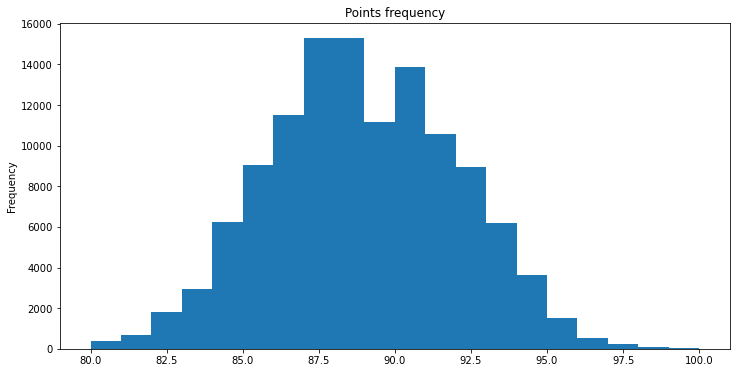

In [12]:
df['points'].plot.hist(bins=20, figsize = (12,6), title = 'Points frequency')

<AxesSubplot:title={'center':'Description length frequency'}, ylabel='Frequency'>

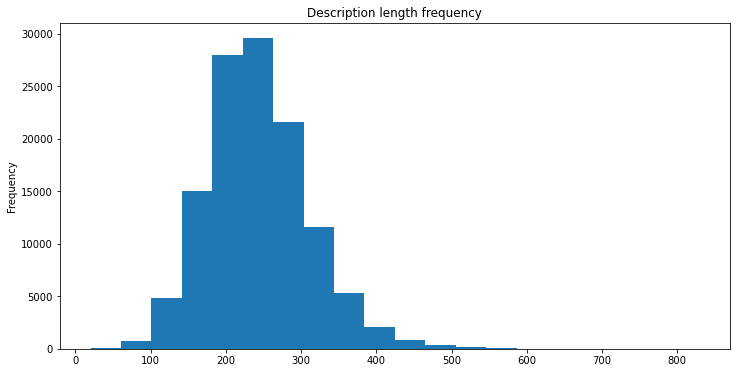

In [13]:
df['desc_len'].plot.hist(bins = 20, figsize = (12,6), title = 'Description length frequency')

<AxesSubplot:title={'center':'Vintage frequency'}, ylabel='Frequency'>

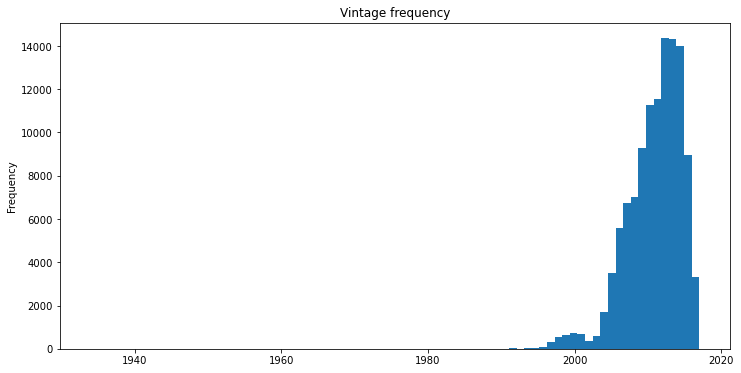

In [14]:
df['vintage'].plot.hist(bins=80, figsize = (12,6), title = 'Vintage frequency')

Now let's check if there is any relationship between the columns. 

The first plot below shows a slight positive relationship between tasting points and description length. In other words, wines with highter tasting points have slightly longer tasting descriptions. 

Similarly, there is a positive relationship between tasting points and price (second graph). In other words, wines with highter tasting points cost slightly more. 

<AxesSubplot:title={'center':'Relationship between tasting points and description length'}, xlabel='points', ylabel='desc_len'>

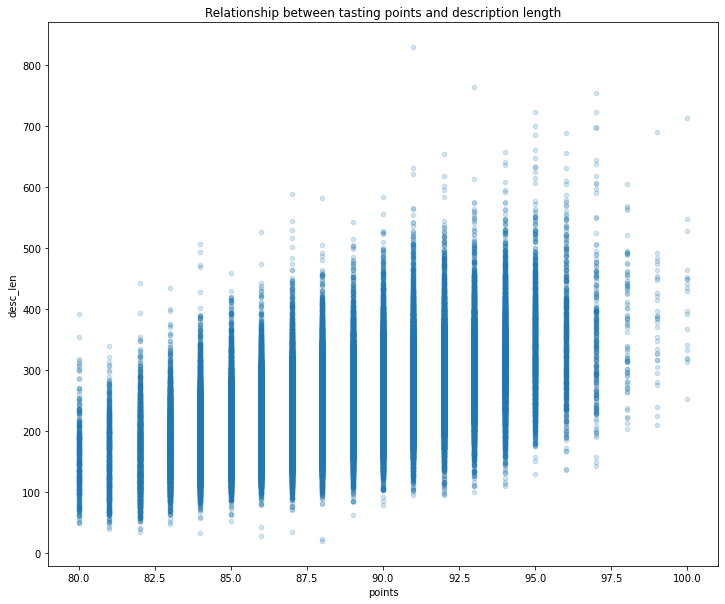

In [15]:
df.plot.scatter(x = 'points', y = 'desc_len', alpha = 0.2, title = 'Relationship between tasting points and description length', figsize = (12,10))

<AxesSubplot:title={'center':'Relationship between tasting points and price'}, xlabel='points', ylabel='price'>

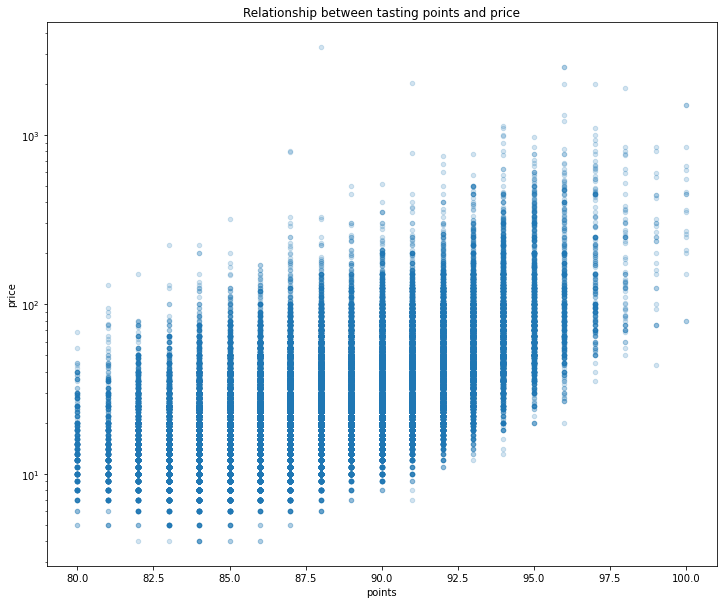

In [16]:
df.plot.scatter(x = 'points', y = 'price', logy = True, alpha = 0.2, title = 'Relationship between tasting points and price', figsize = (12,10))

## Next steps

In separate notebooks we will use this data to answer the following questions:
- How can we find value wines? Which countries, regions and grape varieties we should pay attention to in our search for value wines?
- Can we guess the grape variety based on the wine tasting description? What are the key words for each variety?